In [26]:
import numpy as np
from pandas.tools.plotting import scatter_matrix
from pymatgen import Composition, Element, MPRester, periodic_table
from sklearn import linear_model, cross_validation, metrics, ensemble
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from IPython.display import Image
plt.style.use('ggplot')
%matplotlib inline

In [27]:
df=pd.read_csv('computed-bgap-eform.csv')

In [28]:
df.head()

,Unnamed: 0,materials,bandgaps,formenergies,densities,volume
0,0,LiH,2.9810,-0.482755,0.814396,16.207754
1,1,BeH2,5.3260,-0.152230,0.807534,136.062502
2,2,B9H11,2.9118,-0.174217,0.948949,1.517298
3,3,B2H5,6.3448,-0.160408,0.654836,540.872018
4,4,BH3,5.3234,-0.144371,0.574915,159.837608


In [29]:
# clean unnecessary column from the data
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,materials,bandgaps,formenergies,densities,volume
0,LiH,2.9810,-0.482755,0.814396,16.207754
1,BeH2,5.3260,-0.152230,0.807534,136.062502
2,B9H11,2.9118,-0.174217,0.948949,1.517298
3,B2H5,6.3448,-0.160408,0.654836,540.872018
4,BH3,5.3234,-0.144371,0.574915,159.837608


 Features: 
 
 The datasets is available with not many features. We are going to create more features with relevant information to explain to the machine. 
 
Atomic features: any materials is made of atoms. So,we need to create number of individual atoms in binary system.

In [30]:
def extract_natom_Features(x):
    natomFeatures = []
    fraction = []
    fra = []

    for element in Composition(x[0]):
        fraction.append(Composition(x[0]).get_atomic_fraction(element))

    tol =0.00001
    a=fraction[0]
    for i in range(50):
        b=abs(np.floor(a)-a)
        if  b > tol:
            a=fraction[0]*(i+1)
            
        elif abs(np.ceil(a)-a) > tol:
            a=fraction[0]*(i+1)
            
    fra.append(float(a))
    a=fraction[1]
    for i in range(50):
        b=abs(np.floor(a)-a)
        if b > tol:
            a=fraction[1]*(i+1)
        elif abs(np.ceil(a)-a) > tol:
            a=fraction[1]*(i+1)
        
            
    fra.append(float(a))
         

    natomFeatures.append(fra[0])
    natomFeatures.append(fra[1])

    return list(natomFeatures)


df['natom_Features'] = df.apply(extract_natom_Features, axis=1)

df.head()

,materials,bandgaps,formenergies,densities,volume,natom_Features
0,LiH,2.9810,-0.482755,0.814396,16.207754,"[1.0, 1.0]"
1,BeH2,5.3260,-0.152230,0.807534,136.062502,"[2.0, 1.0]"
2,B9H11,2.9118,-0.174217,0.948949,1.517298,"[11.0, 9.0]"
3,B2H5,6.3448,-0.160408,0.654836,540.872018,"[5.0, 2.0]"
4,BH3,5.3234,-0.144371,0.574915,159.837608,"[3.0, 1.0]"


In [31]:
# split the natom features column to individual atomic columns
atmdf=pd.DataFrame(df.natom_Features.tolist(), )
atmdf.columns = ['Aatom', 'Batom']
atmdf.head()

,Aatom,Batom
0,1.0,1.0
1,2.0,1.0
2,11.0,9.0
3,5.0,2.0
4,3.0,1.0


In [32]:
df=pd.concat([df,atmdf],axis=1)
df.head()

,materials,bandgaps,formenergies,densities,volume,natom_Features,Aatom,Batom
0,LiH,2.9810,-0.482755,0.814396,16.207754,"[1.0, 1.0]",1.0,1.0
1,BeH2,5.3260,-0.152230,0.807534,136.062502,"[2.0, 1.0]",2.0,1.0
2,B9H11,2.9118,-0.174217,0.948949,1.517298,"[11.0, 9.0]",11.0,9.0
3,B2H5,6.3448,-0.160408,0.654836,540.872018,"[5.0, 2.0]",5.0,2.0
4,BH3,5.3234,-0.144371,0.574915,159.837608,"[3.0, 1.0]",3.0,1.0


In [33]:
df=df.drop(['volume','natom_Features'],axis=1)
df.head()

,materials,bandgaps,formenergies,densities,Aatom,Batom
0,LiH,2.9810,-0.482755,0.814396,1.0,1.0
1,BeH2,5.3260,-0.152230,0.807534,2.0,1.0
2,B9H11,2.9118,-0.174217,0.948949,11.0,9.0
3,B2H5,6.3448,-0.160408,0.654836,5.0,2.0
4,BH3,5.3234,-0.144371,0.574915,3.0,1.0


In [34]:
import seaborn as sns
plt.style.use('ggplot')

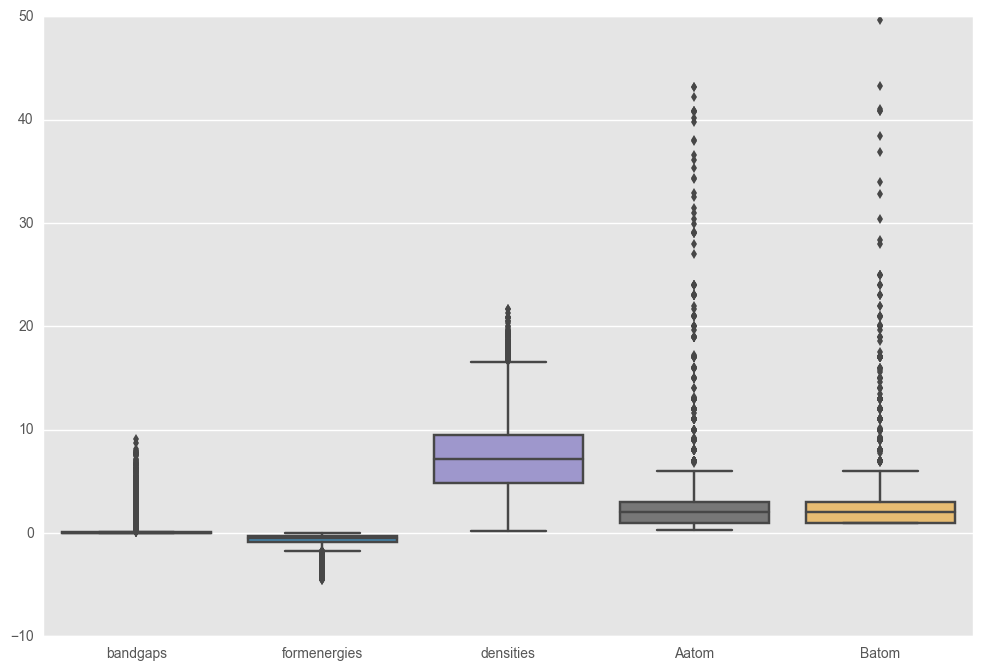

In [35]:
plt.figure().set_size_inches(12, 8)
sns.boxplot(data=df)

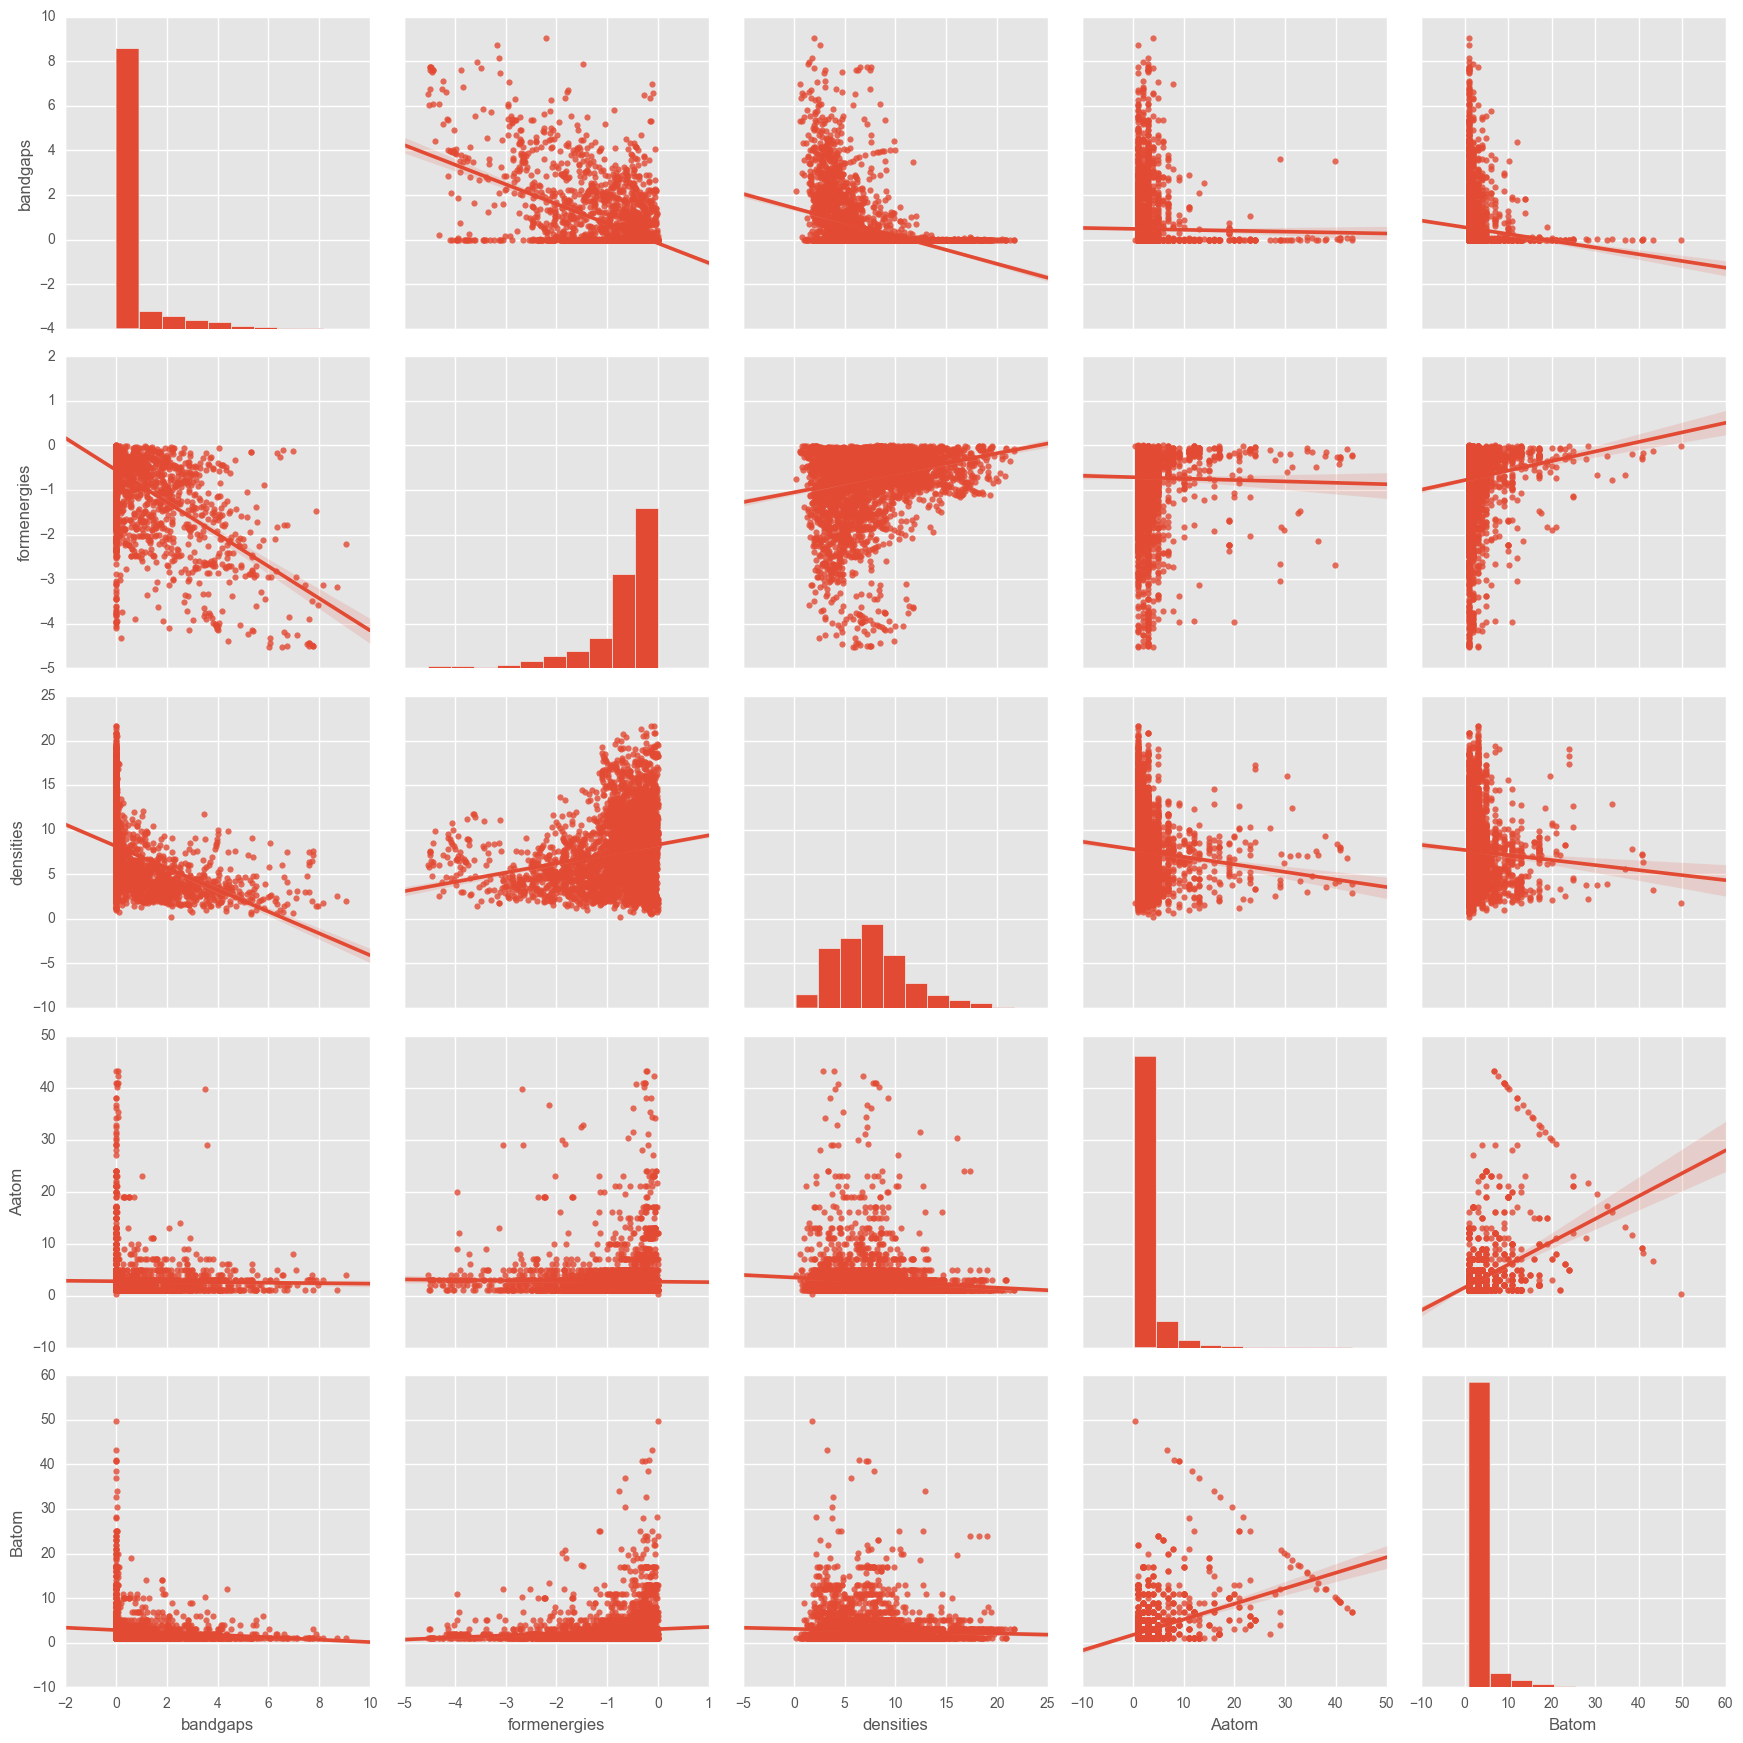

In [36]:
sns.pairplot(df, palette="coolwarm",kind="reg",size=3.5)

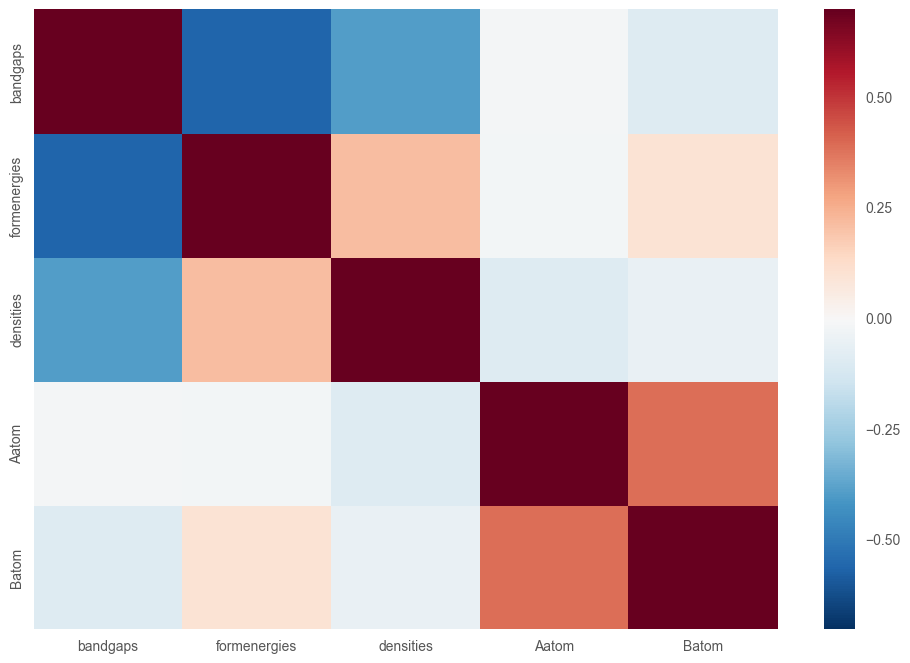

In [37]:
plt.figure().set_size_inches(12, 8)
corr = df.corr()
sns.heatmap(corr, vmax=0.7)

/Users/moshiour/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


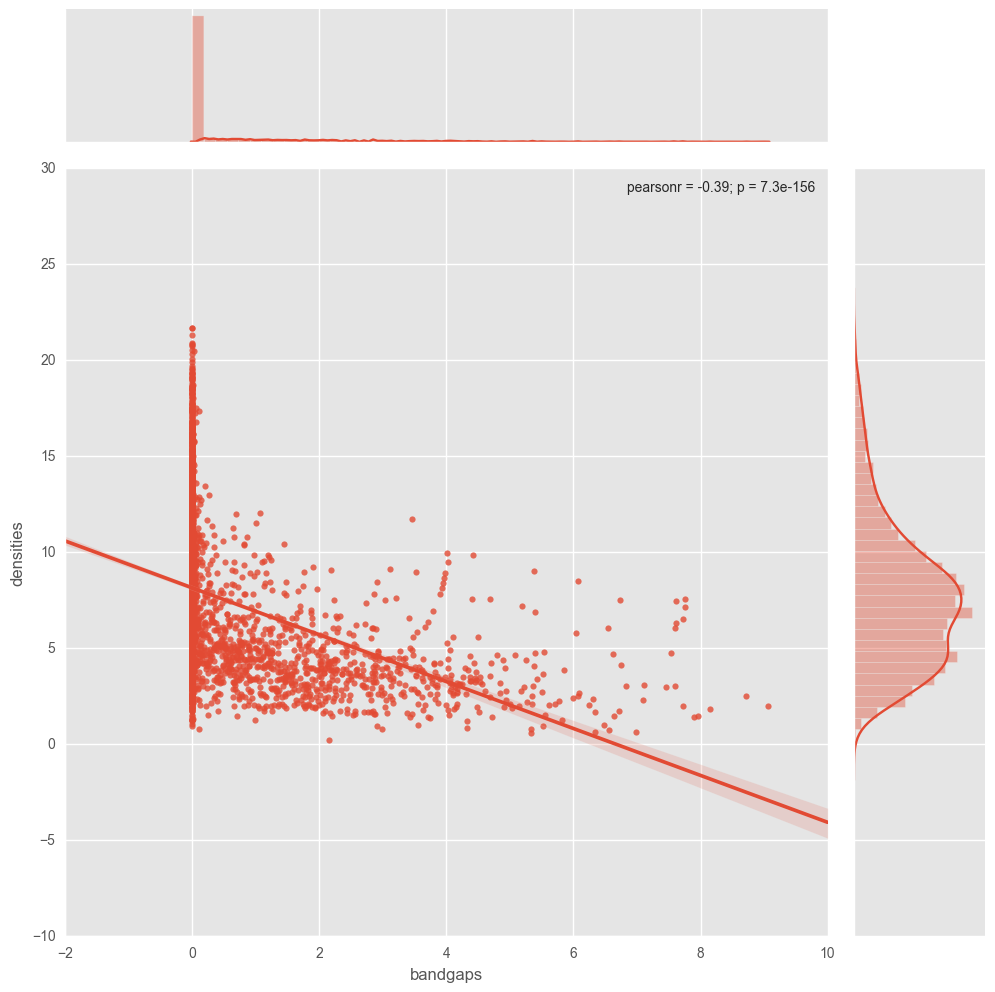

In [38]:
sns.jointplot(x="bandgaps", y="densities", data=df, kind="reg",size=10)

/Users/moshiour/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


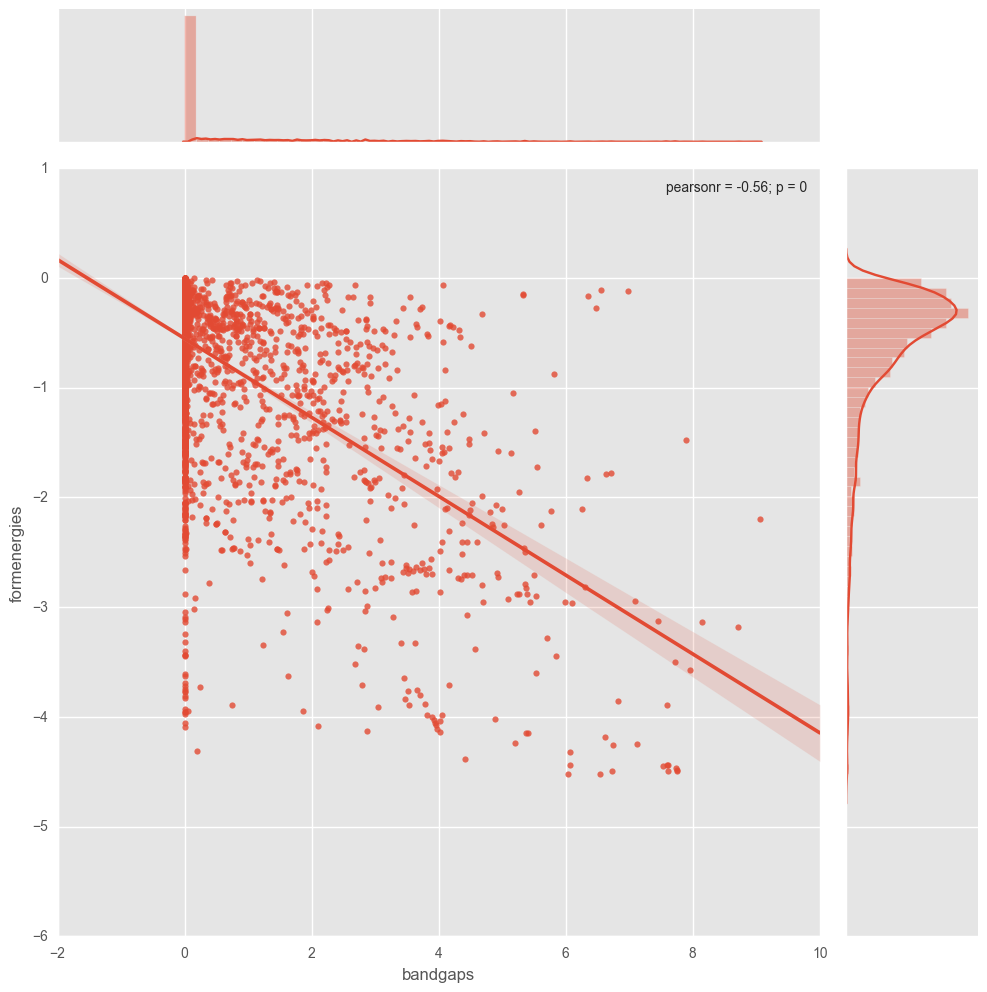

In [39]:
sns.jointplot(x="bandgaps", y="formenergies", data=df, kind="reg",size=10)

In [40]:
# maximum length of elements in compounds
max_Z = 100  

In [41]:
def intrincomp(composition):
    vector = np.zeros((max_Z),dtype=np.float)
    for element in composition:
        fraction = composition.get_atomic_fraction(element)
        vector[element.Z - 1] = float(fraction)
    return (vector)

In [42]:
def extractcompositions(x):
    material = Composition(x[0])
    return list(intrincomp(material))

In [43]:
dfa = df.copy()
dfa['concentrationFeatures'] = dfa.apply(extractcompositions ,axis=1)

In [44]:
dfa.head()

,materials,bandgaps,formenergies,densities,Aatom,Batom,concentrationFeatures
0,LiH,2.9810,-0.482755,0.814396,1.0,1.0,"[0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,BeH2,5.3260,-0.152230,0.807534,2.0,1.0,"[0.666666666667, 0.0, 0.0, 0.333333333333, 0.0..."
2,B9H11,2.9118,-0.174217,0.948949,11.0,9.0,"[0.55, 0.0, 0.0, 0.0, 0.45, 0.0, 0.0, 0.0, 0.0..."
3,B2H5,6.3448,-0.160408,0.654836,5.0,2.0,"[0.714285714286, 0.0, 0.0, 0.0, 0.285714285714..."
4,BH3,5.3234,-0.144371,0.574915,3.0,1.0,"[0.75, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0..."


In [45]:
# split row to multiple columns
dfb=pd.DataFrame(dfa.concentrationFeatures.tolist(), )

In [46]:
dfb.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
4259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0
4260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
dfa=dfa.drop('concentrationFeatures',axis=1)

In [48]:
dfc =pd.concat([dfa,dfb],axis=1)
dfc.head()

,materials,bandgaps,formenergies,densities,Aatom,Batom,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,LiH,2.9810,-0.482755,0.814396,1.0,1.0,0.500000,0.0,0.5,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BeH2,5.3260,-0.152230,0.807534,2.0,1.0,0.666667,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B9H11,2.9118,-0.174217,0.948949,11.0,9.0,0.550000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B2H5,6.3448,-0.160408,0.654836,5.0,2.0,0.714286,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BH3,5.3234,-0.144371,0.574915,3.0,1.0,0.750000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
u = dfc.iloc[:,2:106].values
v = dfc['bandgaps'].ravel()

In [50]:
ymax=dfc['bandgaps'].max();ymin=dfc['bandgaps'].min()

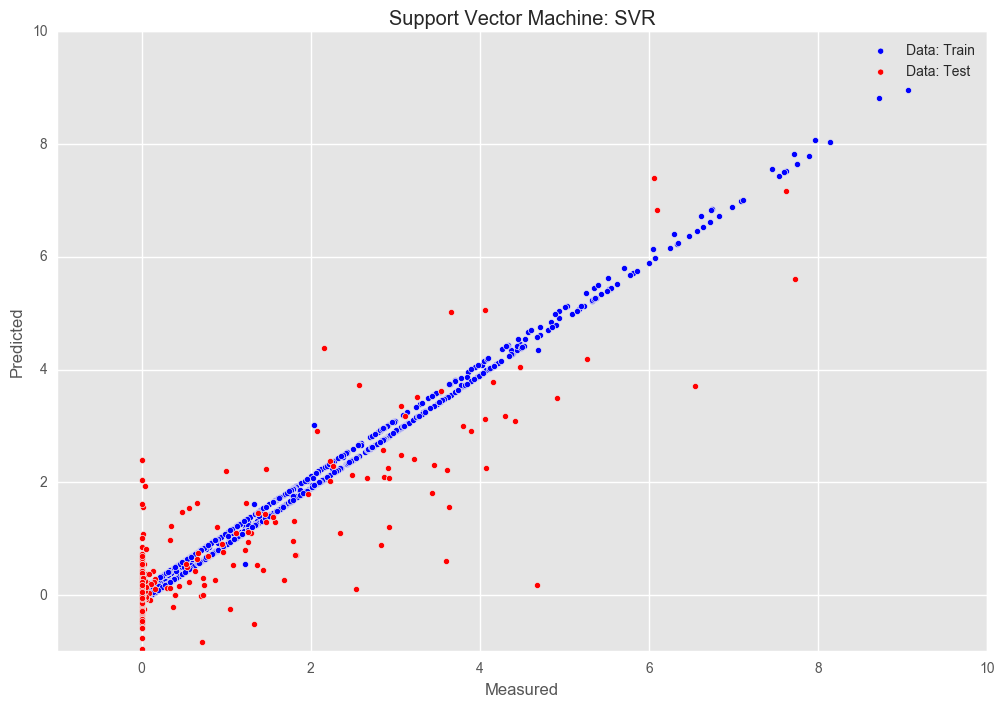

In [51]:
# Support vector machine

from sklearn.svm import SVR

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(u, v, test_size=0.10, random_state=7)
#############################################################################
# Fit regression model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1,epsilon=0.1,cache_size=500)

svr.fit(X_train, y_train)

y_svr = svr.predict(X_train)

y_svrt = svr.predict(X_test)
######################################
# Plot
plt.figure().set_size_inches(12, 8)
plt.scatter(y_train, y_svr,c='b',label='Data: Train')
plt.scatter(y_test, y_svrt,c='r' ,label='Data: Test')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("Support Vector Machine: SVR")
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.legend()

In [52]:
from sklearn.svm import SVR

from sklearn.cross_validation import cross_val_score

cross_val_score(SVR(kernel='rbf', C=1e3, gamma=0.1,epsilon=0.1,cache_size=500), u, v, cv=10)

array([ 0.33443663, -0.04708261,  0.36292703,  0.52051397,  0.02689391,
        0.4087051 ,  0.71689775,  0.73868765,  0.36320069,  0.49039925])

In [53]:
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

param_range = np.logspace(-6, -1, 5)
val_train, val_test = validation_curve(SVR(), u, v,         
                                    param_name="gamma", param_range=param_range,
                                       cv=10, scoring=rms_error, n_jobs=1)

/Users/moshiour/anaconda/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


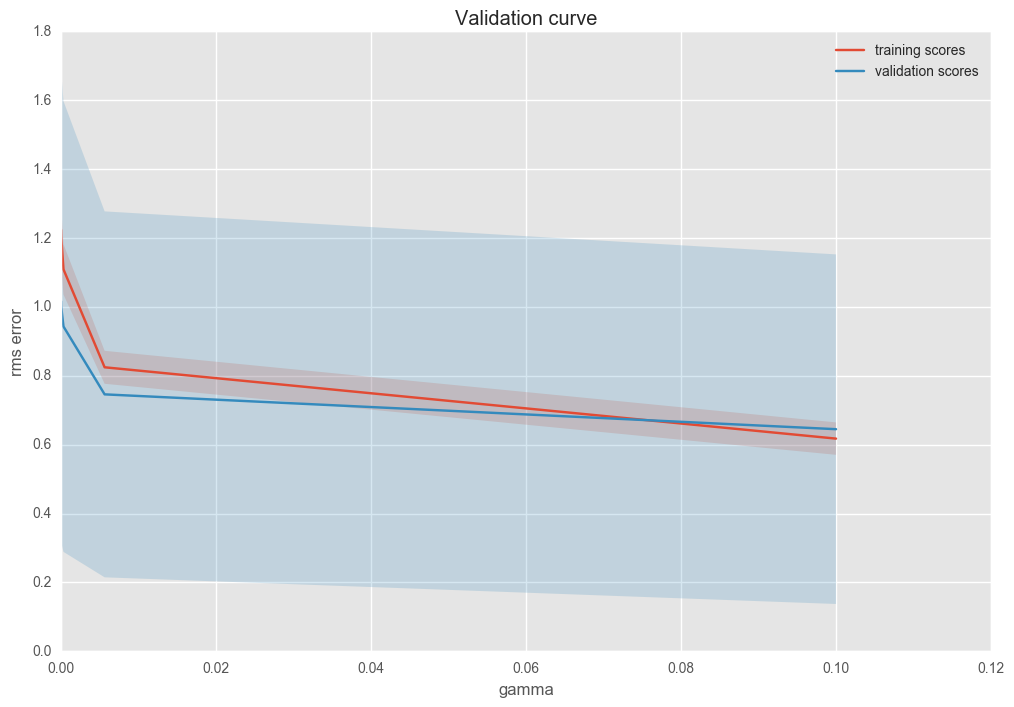

In [54]:
plt.figure().set_size_inches(12, 8)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    
plot_with_err(param_range, val_train, label='training scores')
plot_with_err(param_range, val_test, label='validation scores')
plt.xlabel('gamma'); plt.ylabel('rms error')
plt.title("Validation curve")
plt.legend()

In [55]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(vgma=0.08):
    train_sizes = np.linspace(0.02, 1.0, 10.0)
    N_train, val_train, val_test = learning_curve(SVR(kernel='rbf', C=1e3, gamma=vgma),
                                                  u, v, train_sizes, cv=10,
                                                  scoring=rms_error)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.ylim(0, 3)
    plt.title("Learning curve")
    plt.legend()

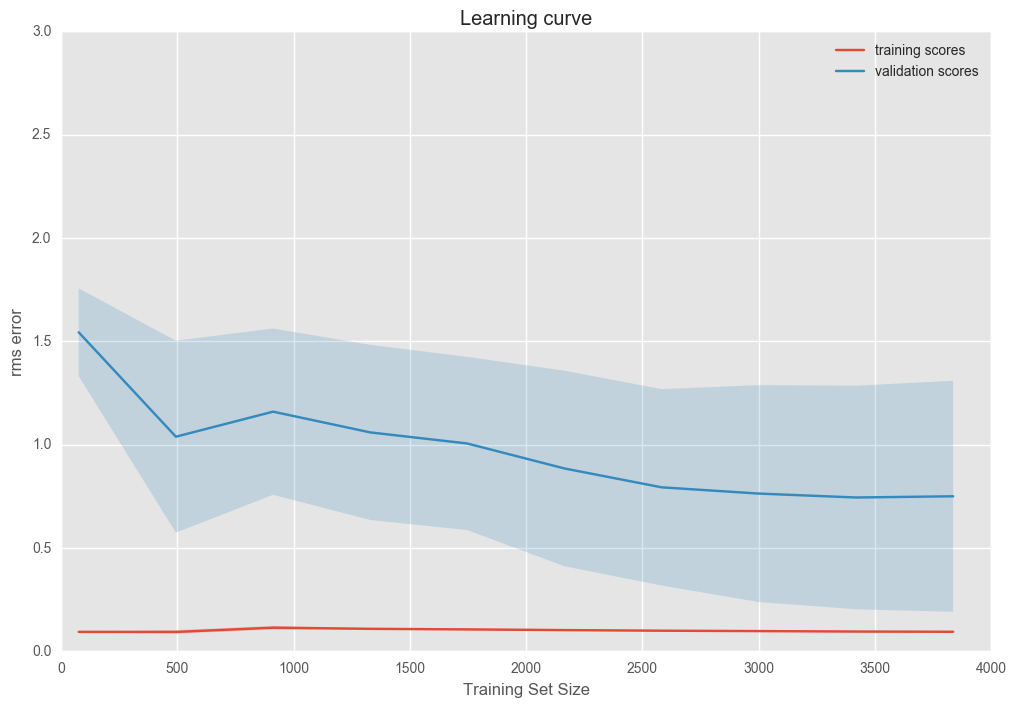

In [56]:
plt.figure().set_size_inches(12, 8)
plot_learning_curve(0.09)

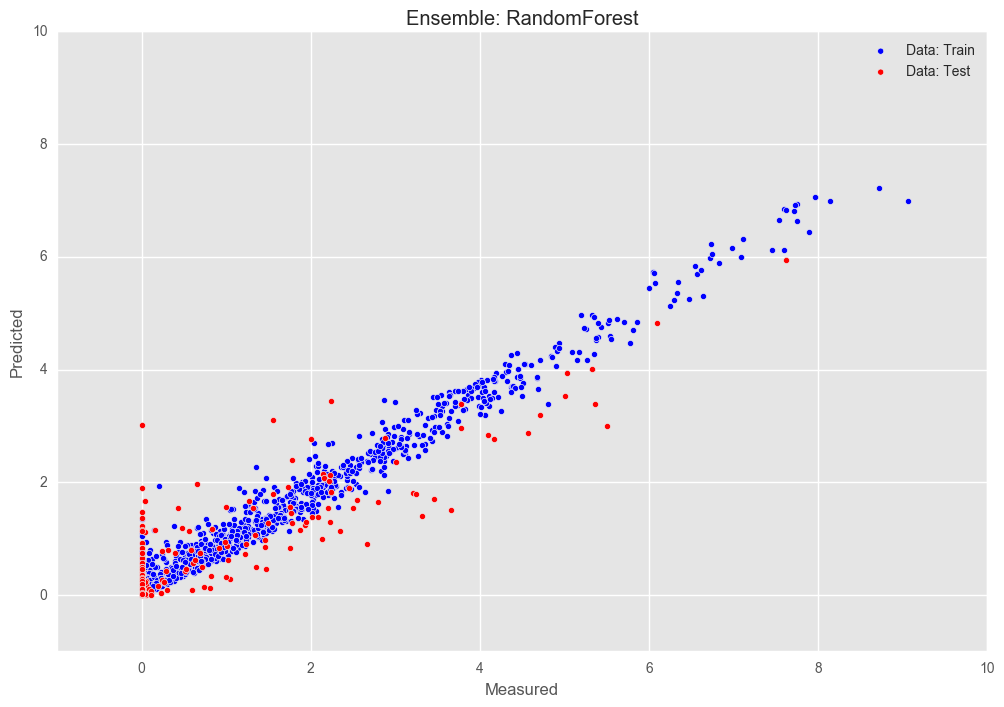

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(u, v, test_size=0.10, random_state=0)

max_depth = 1650
regr_rf = RandomForestRegressor(n_estimators=1800, criterion='mse',max_depth=max_depth,
                                bootstrap=True, max_features='log2', random_state=5)
regr_rf.fit(X_train, y_train)
# Predict on new data
y_rf = regr_rf.predict(X_train)
y_rft = regr_rf.predict(X_test)

# Plot the results
plt.figure().set_size_inches(12, 8)
plt.scatter(y_train, y_rf, c='b',label='Data: Train')
plt.scatter(y_test, y_rft, c='r' ,label='Data: Test')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("Ensemble: RandomForest")
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.legend()

In [58]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_validation import cross_val_score

cross_val_score(RandomForestRegressor(n_estimators=1800, criterion='mse',max_depth=max_depth,
                                bootstrap=True, max_features='log2', random_state=5), u, v, cv=10)

array([ 0.52128046, -0.01193049,  0.21615057,  0.14533362,  0.45941427,
        0.6552164 ,  0.70334799,  0.65127953,  0.78429521,  0.72839694])

In [59]:
# Bias-Variance decomposition
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

param_range = [20,300,600]
val_train, val_test = validation_curve(RandomForestRegressor(), u, v,         
                                    param_name="n_estimators", param_range=param_range,
                                       cv=10, scoring=rms_error, n_jobs=1)

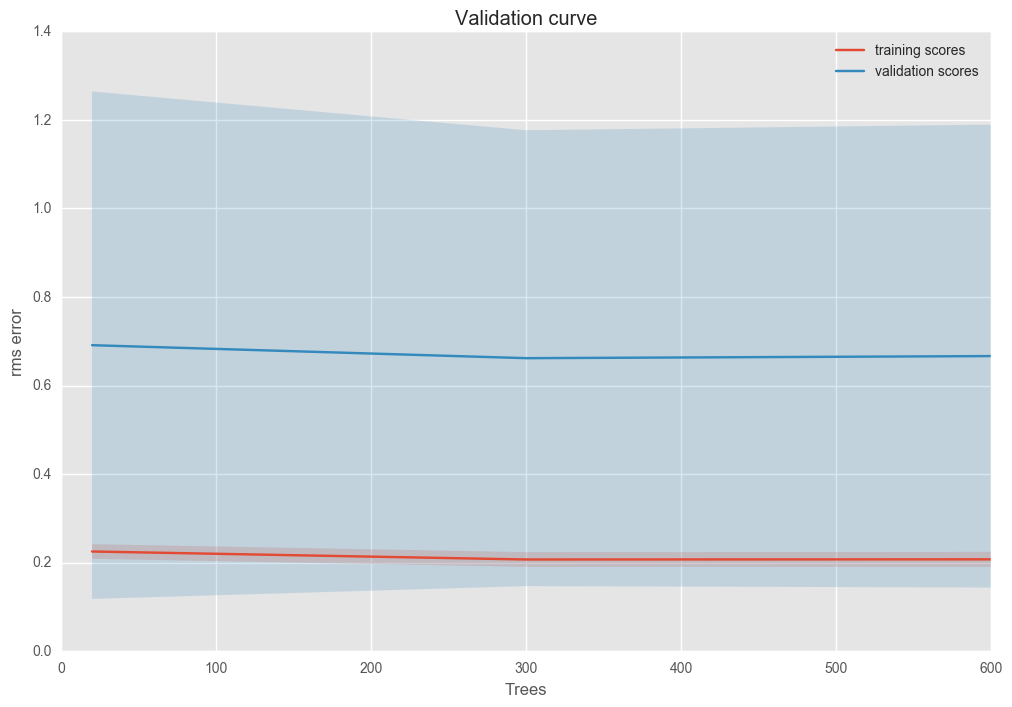

In [60]:
plt.figure().set_size_inches(12, 8)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    
plot_with_err(param_range, val_train, label='training scores')
plot_with_err(param_range, val_test, label='validation scores')
plt.xlabel('Trees'); plt.ylabel('rms error')
plt.title("Validation curve")
plt.legend()

In [61]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(max_depth=950):
    train_sizes = np.linspace(0.02, 1.0, 10.0)
    N_train, val_train, val_test = learning_curve(RandomForestRegressor(n_estimators=500, 
                                            criterion='mse',max_depth=max_depth,
                                            bootstrap=True,max_features='auto',random_state=5),
                                    u, v, train_sizes, cv=5, scoring=rms_error)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.ylim(0, 3)
    plt.title("Learning curve")
    plt.legend()

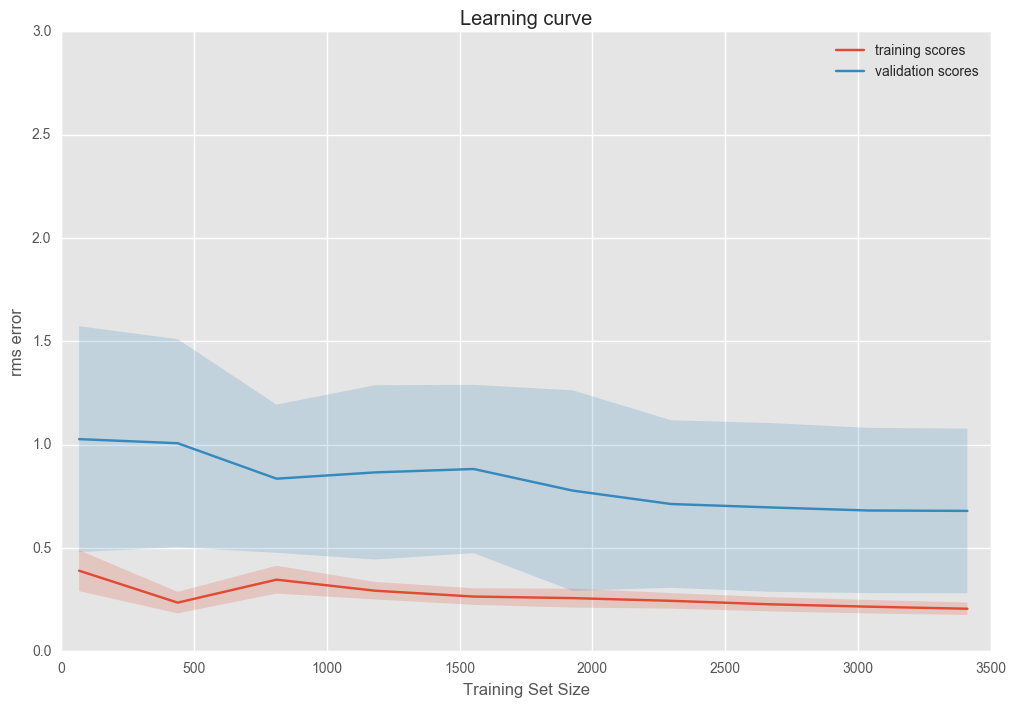

In [62]:
plt.figure().set_size_inches(12, 8)
plot_learning_curve(1000)

score: 0.997858197155


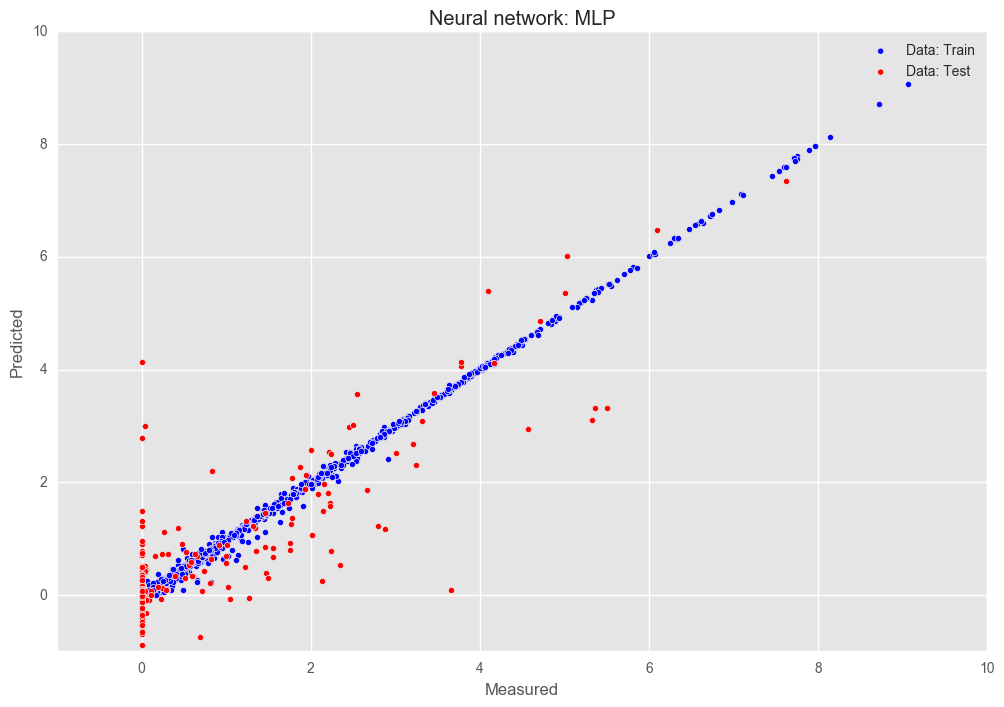

In [63]:
# Multi-layer Perception Neural network: MLP

from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(u, v, test_size=0.10, random_state=0)


regr_nnk = MLPRegressor(hidden_layer_sizes=(500, ), activation='relu', solver='lbfgs', 
                        alpha=0.0001, batch_size='auto', learning_rate='constant', 
                        learning_rate_init=0.001, power_t=0.5, max_iter=9000, shuffle=True, 
                        random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
regr_nnk.fit(X_train, y_train)

# Predict on new data
y_nnk = regr_nnk.predict(X_train)
y_nnkt = regr_nnk.predict(X_test)

scr = regr_nnk.score(X_train, y_train, sample_weight=None)
print('score:',scr)

# Plot the results
plt.figure().set_size_inches(12, 8)
plt.scatter(y_train, y_nnk, c='b',label='Data: Train')
plt.scatter(y_test, y_nnkt, c='r' ,label='Data: Test')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("Neural network: MLP")
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.legend()

In [64]:
from sklearn.neural_network import MLPRegressor

from sklearn.cross_validation import cross_val_score

cross_val_score(MLPRegressor(hidden_layer_sizes=(500, ), activation='relu', solver='lbfgs', 
                        alpha=0.0001, batch_size='auto', learning_rate='constant', 
                        learning_rate_init=0.001, power_t=0.5, max_iter=9000, shuffle=True, 
                        random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08), u, v, cv=10)

array([ 0.05055032,  0.24756119, -0.22270525,  0.3551393 ,  0.2662011 ,
       -0.31008538,  0.51653327,  0.72087241,  0.41063308,  0.26489157])

In [65]:
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

param_range = [20,50,200]
val_train, val_test = validation_curve(MLPRegressor(), u, v,         
                                    param_name="hidden_layer_sizes", param_range=param_range,
                                       cv=10, scoring=rms_error, n_jobs=1)

/Users/moshiour/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


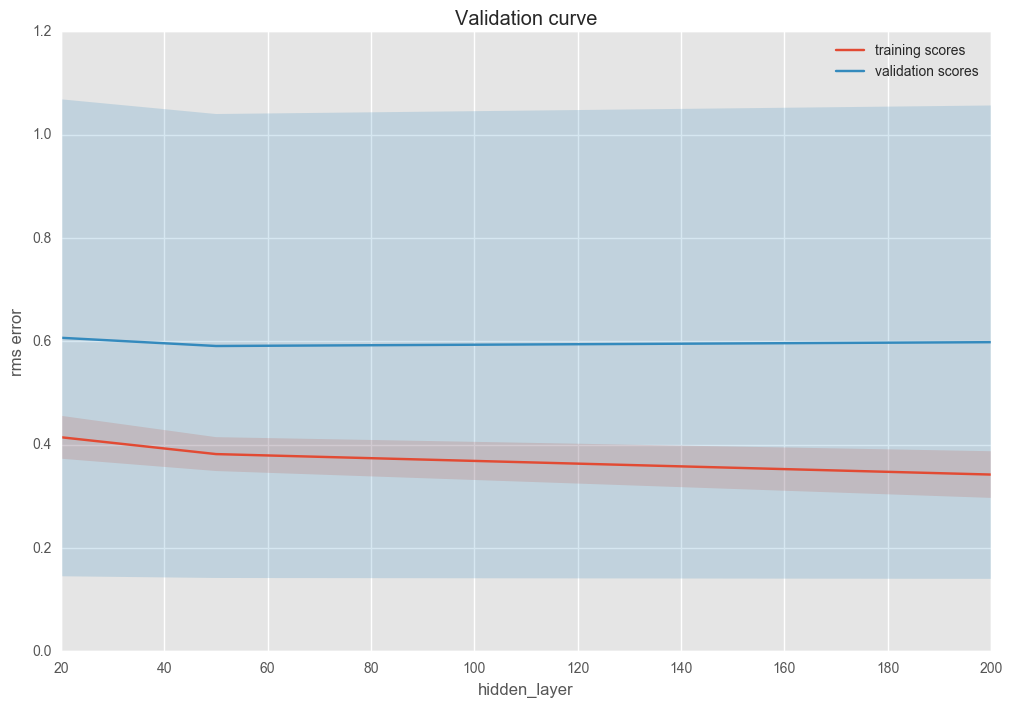

In [66]:
plt.figure().set_size_inches(12, 8)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    
plot_with_err(param_range, val_train, label='training scores')
plot_with_err(param_range, val_test, label='validation scores')
plt.xlabel('hidden_layer'); plt.ylabel('rms error')
plt.title("Validation curve")
plt.legend();

In [67]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(miter=100):
    train_sizes = np.linspace(0.02, 1.0, 10.0)
    N_train, val_train, val_test = learning_curve(MLPRegressor(hidden_layer_sizes=(500, ), activation='relu', solver='lbfgs', 
                        alpha=0.0001, batch_size='auto', learning_rate='constant', 
                        learning_rate_init=0.001, power_t=0.5, max_iter=miter, shuffle=True, 
                        random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                                                  u, v, train_sizes, cv=10,
                                                  scoring=rms_error)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.ylim(0, 3)
    plt.title("Learning curve")
    plt.legend()

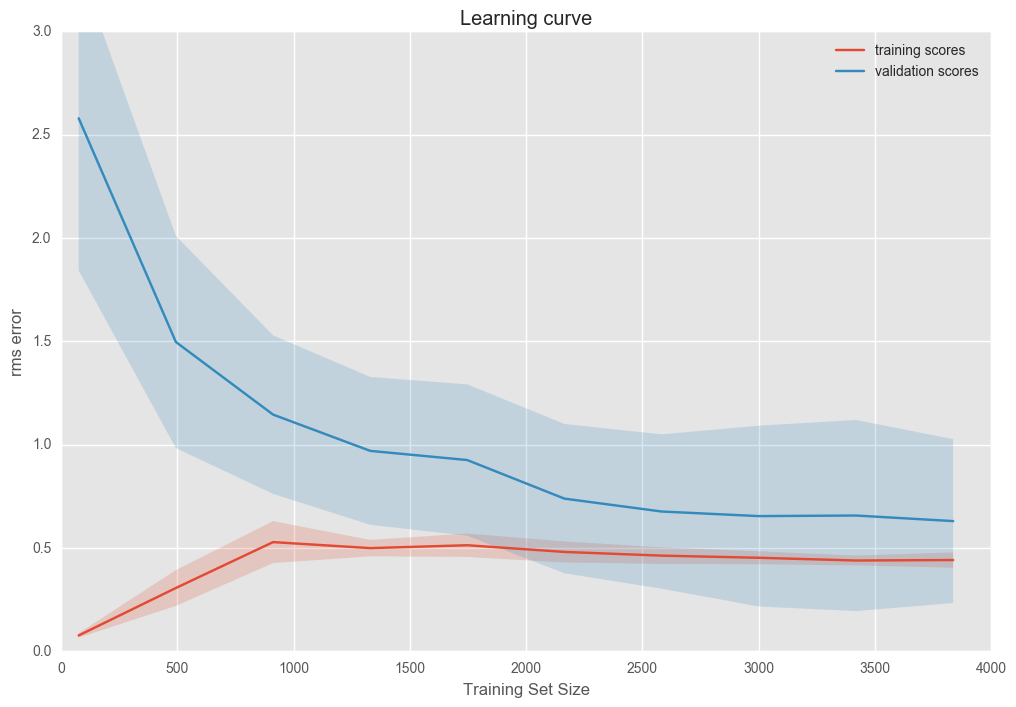

In [68]:
plt.figure().set_size_inches(12, 8)
plot_learning_curve(500)

In [69]:
def extractphysicalFeatures(x):
    moreFeatures = []
    fraction = []
    atomicNo = []
    eneg = []
    group = []

    for element in Composition(x[0]):
        fraction.append(Composition(x[0]).get_atomic_fraction(element))
        atomicNo.append(float(element.Z))
        eneg.append(element.X)
        group.append(float(element.group)) # atomic numbers

    # We want to sort this feature set
    # according to which element in the binary compound is more abundant
    mustReverse = False

    if fraction[1] > fraction[0]:
        mustReverse = True
         
    for features in [fraction, atomicNo, eneg, group]:
        if mustReverse:
            features.reverse()
    moreFeatures.append(fraction[0] / fraction[1])
    moreFeatures.append(eneg[0] - eneg[1])
    moreFeatures.append(group[0])
    moreFeatures.append(group[1])
    moreFeatures.append(x[2])
    moreFeatures.append(x[3])
    return tuple(moreFeatures)


dfa['moreFeatures'] = dfa.apply(extractphysicalFeatures, axis=1)

dfa.head(10)

,materials,bandgaps,formenergies,densities,Aatom,Batom,moreFeatures
0,LiH,2.9810,-0.482755,0.814396,1.0,1.0,"(1.0, 1.2200000000000002, 1.0, 1.0, -0.4827545..."
1,BeH2,5.3260,-0.152230,0.807534,2.0,1.0,"(2.0, 0.6300000000000001, 1.0, 2.0, -0.1522302..."
2,B9H11,2.9118,-0.174217,0.948949,11.0,9.0,"(1.2222222222222223, 0.16000000000000014, 1.0,..."
3,B2H5,6.3448,-0.160408,0.654836,5.0,2.0,"(2.5, 0.16000000000000014, 1.0, 13.0, -0.16040..."
4,BH3,5.3234,-0.144371,0.574915,3.0,1.0,"(3.0, 0.16000000000000014, 1.0, 13.0, -0.14437..."
5,B5H7,3.5551,-0.171769,0.985537,7.0,5.0,"(1.4000000000000001, 0.16000000000000014, 1.0,..."
6,H2C,6.4750,-0.269971,1.025447,2.0,1.0,"(2.0, -0.34999999999999964, 1.0, 14.0, -0.2699..."
7,H3N,4.3287,-0.541612,0.844612,3.0,1.0,"(3.0, -0.8399999999999999, 1.0, 15.0, -0.54161..."
8,H2O,5.5175,-1.390833,0.958091,1.0,2.0,"(2.0, -1.2399999999999998, 1.0, 16.0, -1.39083..."
9,HF,6.7187,-1.781524,1.721541,1.0,1.0,"(1.0, -1.7799999999999998, 1.0, 17.0, -1.78152..."


In [70]:
dfe=pd.DataFrame(dfa.moreFeatures.tolist(), )

In [71]:
dfe.head(10)

,0,1,2,3,4,5
0,1.000000,1.22,1.0,1.0,-0.482755,0.814396
1,2.000000,0.63,1.0,2.0,-0.152230,0.807534
2,1.222222,0.16,1.0,13.0,-0.174217,0.948949
3,2.500000,0.16,1.0,13.0,-0.160408,0.654836
4,3.000000,0.16,1.0,13.0,-0.144371,0.574915
5,1.400000,0.16,1.0,13.0,-0.171769,0.985537
6,2.000000,-0.35,1.0,14.0,-0.269971,1.025447
7,3.000000,-0.84,1.0,15.0,-0.541612,0.844612
8,2.000000,-1.24,1.0,16.0,-1.390833,0.958091
9,1.000000,-1.78,1.0,17.0,-1.781524,1.721541


In [72]:
dff =pd.concat([dfe,dfb],axis=1)
dff.head()

,0,1,2,3,4,5,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.22,1.0,1.0,-0.482755,0.814396,0.500000,0.0,0.5,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.000000,0.63,1.0,2.0,-0.152230,0.807534,0.666667,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.222222,0.16,1.0,13.0,-0.174217,0.948949,0.550000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.500000,0.16,1.0,13.0,-0.160408,0.654836,0.714286,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.000000,0.16,1.0,13.0,-0.144371,0.574915,0.750000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
ua = dff.values

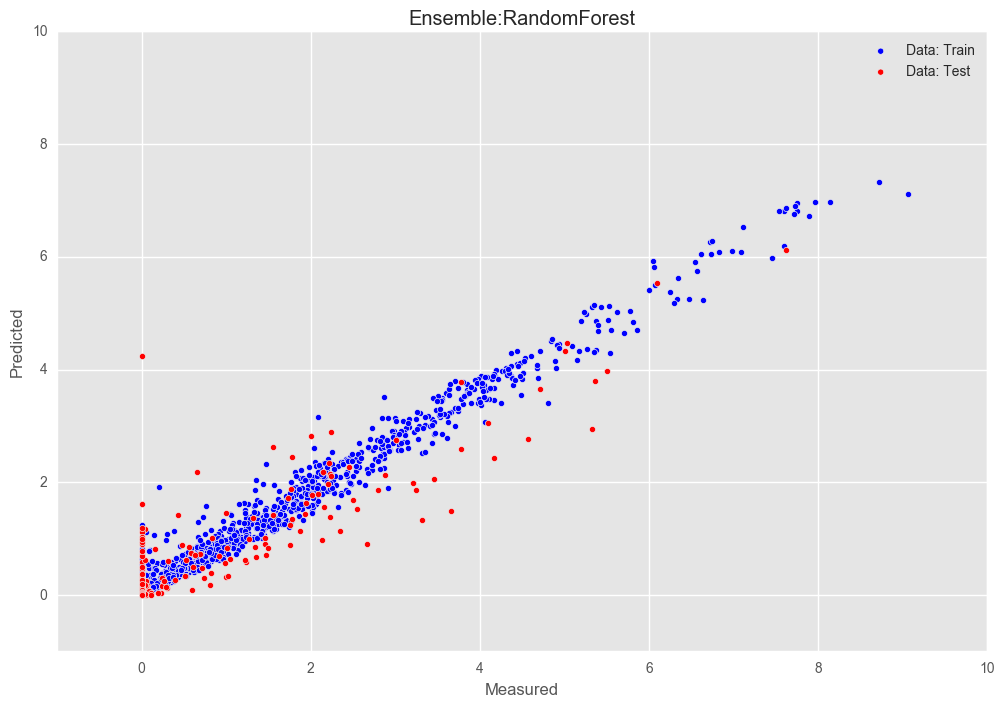

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ua, v, test_size=0.1, random_state=0)

max_depth = 1000
regr_rf = RandomForestRegressor(n_estimators=1800, criterion='mse',max_depth=max_depth,
                                bootstrap=True, max_features='log2', random_state=5)
regr_rf.fit(X_train, y_train)
# Predict on new data
y_rf = regr_rf.predict(X_train)
y_rft = regr_rf.predict(X_test)

# Plot the results
plt.figure().set_size_inches(12, 8)
plt.scatter(y_train, y_rf, c='b',label='Data: Train')
plt.scatter(y_test, y_rft, c='r' ,label='Data: Test')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("Ensemble:RandomForest")
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.legend()

In [75]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_validation import cross_val_score

cross_val_score(RandomForestRegressor(n_estimators=1800, criterion='mse',max_depth=max_depth,
                                bootstrap=True, max_features='log2', random_state=5), ua, v, cv=10)

array([ 0.48213206,  0.04825825,  0.56426364,  0.240199  ,  0.67150387,
        0.7509612 ,  0.7676706 ,  0.79978755,  0.82437032,  0.79074412])

In [76]:
# Bias-Variance decomposition
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

param_range = [20,300,600]
val_train, val_test = validation_curve(RandomForestRegressor(), ua, v,         
                                    param_name="n_estimators", param_range=param_range,
                                       cv=10, scoring=rms_error, n_jobs=1)

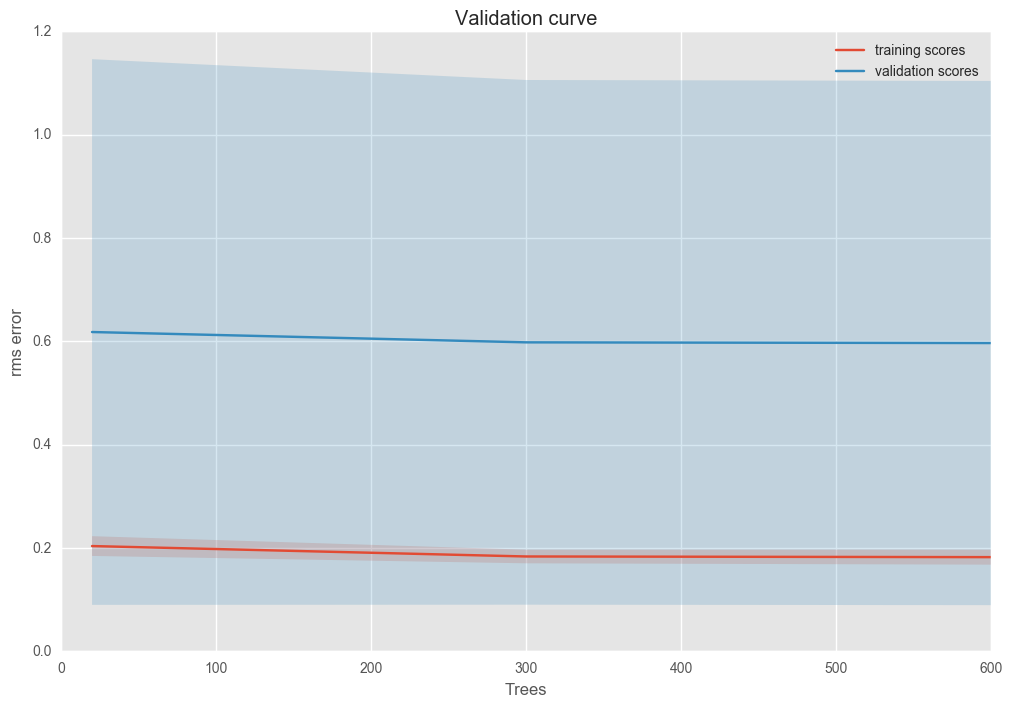

In [77]:
plt.figure().set_size_inches(12, 8)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    
plot_with_err(param_range, val_train, label='training scores')
plot_with_err(param_range, val_test, label='validation scores')
plt.xlabel('Trees'); plt.ylabel('rms error')
plt.title("Validation curve")
plt.legend()

In [78]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(max_depth=950):
    train_sizes = np.linspace(0.02, 1.0, 10.0)
    N_train, val_train, val_test = learning_curve(RandomForestRegressor(n_estimators=500, 
                                            criterion='mse',max_depth=max_depth,
                                            bootstrap=True,max_features='auto',random_state=5),
                                    ua, v, train_sizes, cv=5, scoring=rms_error)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.ylim(0, 3)
    plt.title("Learning curve")
    plt.legend()

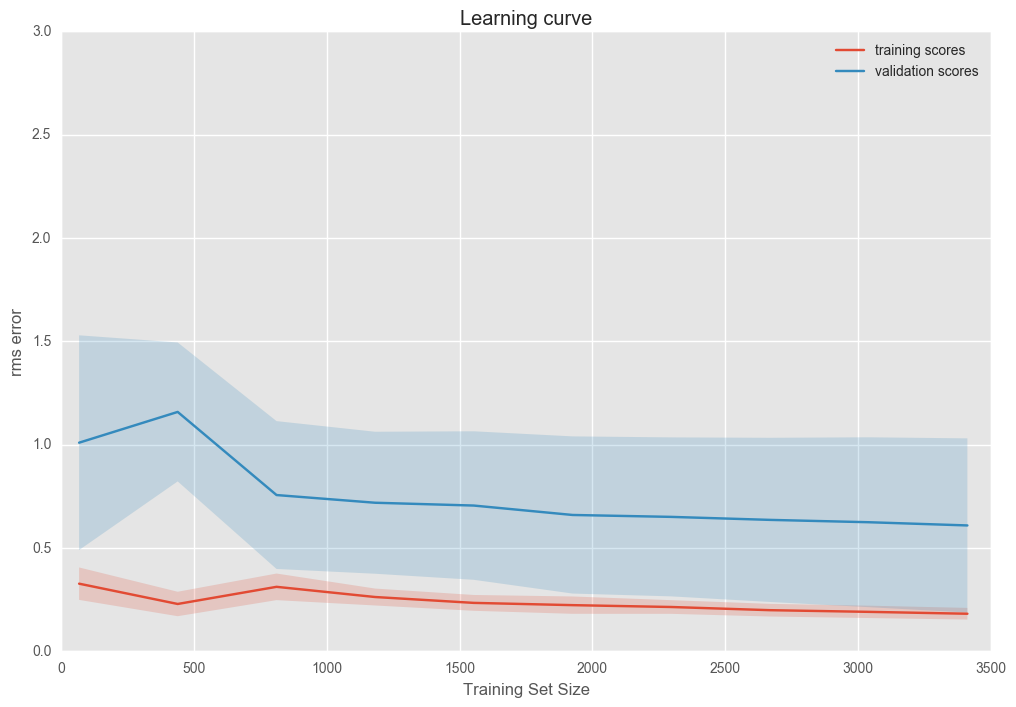

In [79]:
plt.figure().set_size_inches(12, 8)
plot_learning_curve(1000)

score: 0.988714643386


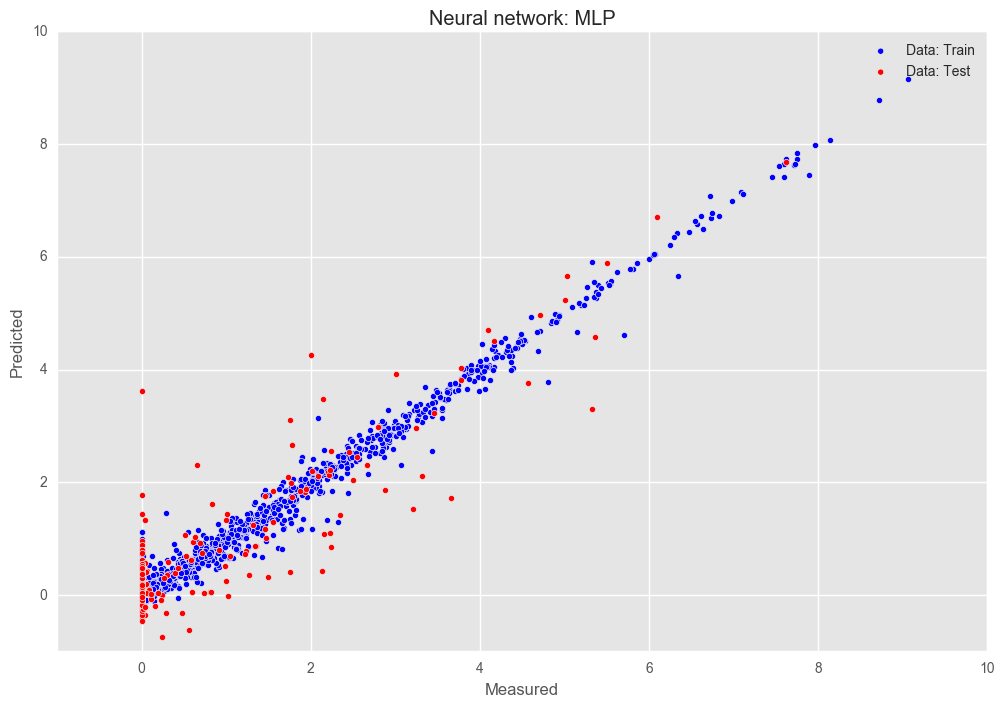

In [80]:
# Multi-layer Perception Neural network: MLP

from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ua, v, test_size=0.1, random_state=0)


regr_nnk = MLPRegressor(hidden_layer_sizes=(500, ), activation='relu', 
                        solver='lbfgs', alpha=0.0001, batch_size='auto', 
                        learning_rate='constant', learning_rate_init=0.001, 
                        power_t=0.5, max_iter=9000, shuffle=True, random_state=None, 
                        tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                        nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                        beta_1=0.9, beta_2=0.999, epsilon=1e-08)
regr_nnk.fit(X_train, y_train)

# Predict on new data
y_nnk = regr_nnk.predict(X_train)
y_nnkt = regr_nnk.predict(X_test)

scr = regr_nnk.score(X_train, y_train, sample_weight=None)
print('score:',scr)

# Plot the results
plt.figure().set_size_inches(12, 8)
plt.scatter(y_train, y_nnk, c='b',label='Data: Train')
plt.scatter(y_test, y_nnkt, c='r' ,label='Data: Test')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("Neural network: MLP")
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.legend()

In [81]:
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

param_range = [5,50,200]
val_train, val_test = validation_curve(MLPRegressor(), ua, v,         
                                    param_name="hidden_layer_sizes", param_range=param_range,
                                       cv=10, scoring=rms_error, n_jobs=1)

/Users/moshiour/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/moshiour/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/moshiour/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


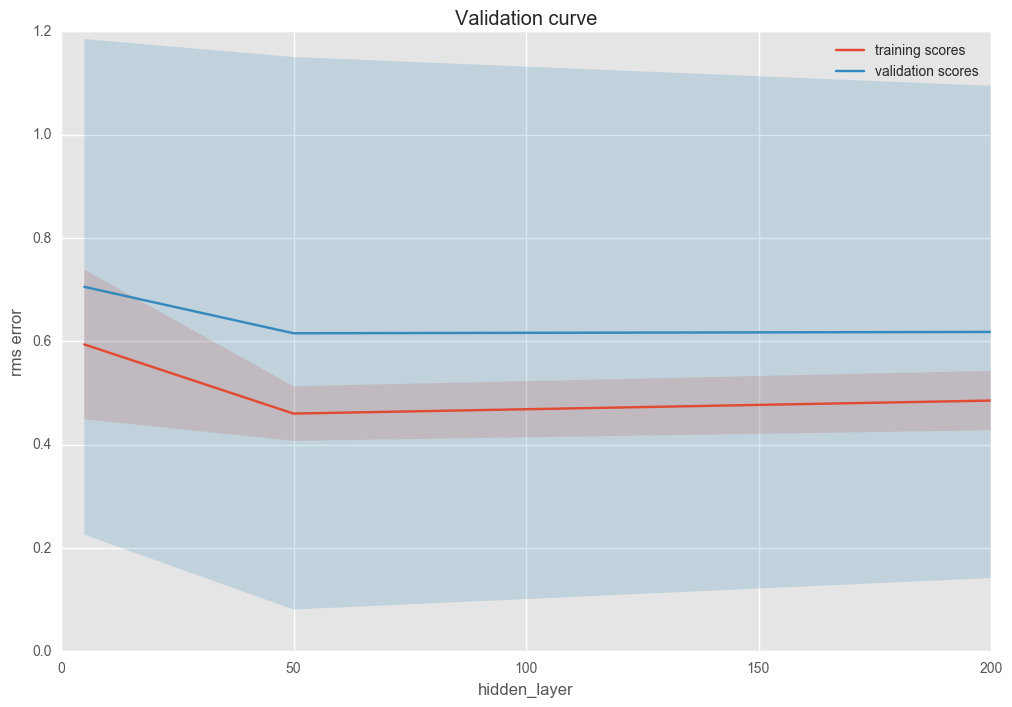

In [82]:
plt.figure().set_size_inches(12, 8)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    
plot_with_err(param_range, val_train, label='training scores')
plot_with_err(param_range, val_test, label='validation scores')
plt.xlabel('hidden_layer'); plt.ylabel('rms error')
plt.title("Validation curve")
plt.legend();

In [83]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(miter=100):
    train_sizes = np.linspace(0.02, 1.0, 10.0)
    N_train, val_train, val_test = learning_curve(MLPRegressor(hidden_layer_sizes=(500, ), activation='relu', solver='lbfgs', 
                        alpha=0.0001, batch_size='auto', learning_rate='constant', 
                        learning_rate_init=0.001, power_t=0.5, max_iter=miter, shuffle=True, 
                        random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                                                  ua, v, train_sizes, cv=10,
                                                  scoring=rms_error)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.ylim(0, 3)
    plt.title("Learning curve")
    plt.legend()

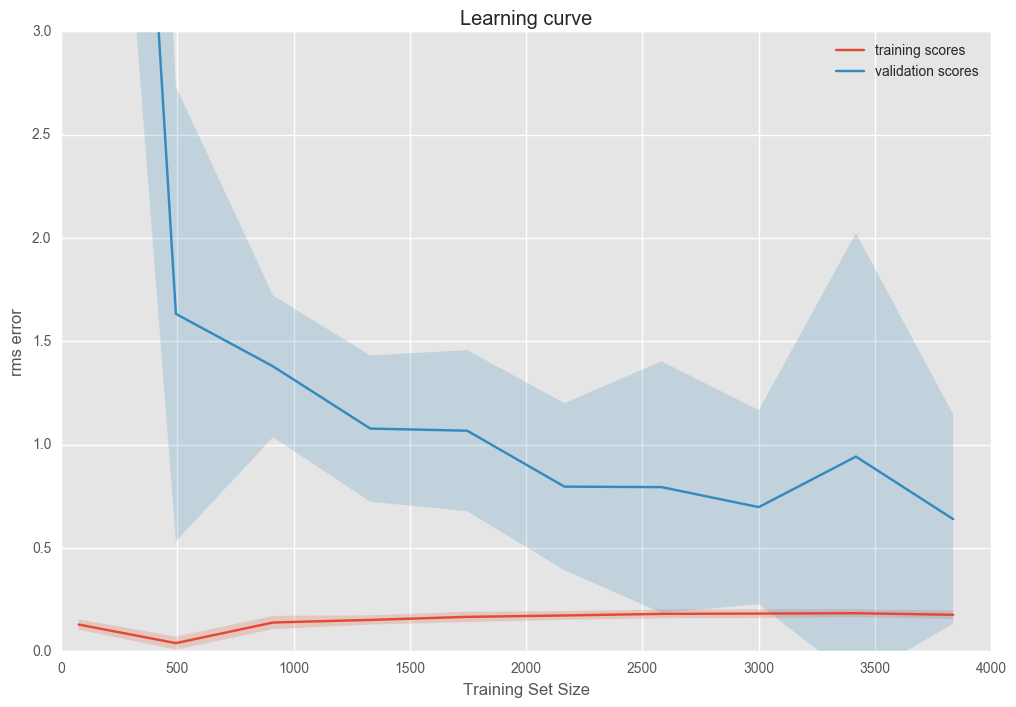

In [84]:
plt.figure().set_size_inches(12, 8)
plot_learning_curve(5000)